# Initialization

In [1]:
rm(list = ls())

library(data.table)
library(tidyverse)
library(rJava)
library(RNetLogo)

library(lhs)  # For maximin Latin hypercube sampling
library(ggplot2)
library(plotly)  # For beautiful plotting
library(caret)
library(randomForest)
library(factoextra)
library(e1071)
library(TSrepr)  # for evaluating predictive power

require(gridExtra)

options(warn = -1)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::between()   masks data.table::between()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x purrr::flatten()   masks jsonlite::flatten()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x purrr::transpose() masks data.table::transpose()
Loading required package: igraph

Attaching package: 'igraph'

The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union

The following objects are masked from 'package:purrr':

    compose, simplify

The following object is masked from 'package:tidyr':

    crossing

The following object is masked from 'package:tibble':

    as_data_fram

In [2]:
folder.path   = "C:/Users/paslanpatir/Desktop/TEZ_v2/"
output.folder = paste0("outputs/tuning_LOOB")

nl.model.1 = "Segregation"
model.type.1 = ifelse(nl.model.1 == "Segregation", "basic", "dummy")
outputs.path.1.1 = paste0(folder.path,output.folder,"/",model.type.1,"_train50_tune.csv")
outputs.path.1.2 = paste0(folder.path,output.folder,"/",model.type.1,"_train100_tune.csv")

nl.model.2 = "Segregation_Dummy"
model.type.2 = ifelse(nl.model.2 == "Segregation_Dummy", "dummy", "basic")
outputs.path.2.1 = paste0(folder.path,output.folder,"/",model.type.2,"_train50_tune.csv")
outputs.path.2.2 = paste0(folder.path,output.folder,"/",model.type.2,"_train100_tune.csv")


In [3]:
output.folder10 = paste0("outputs/tuning_10CV")

nl.model.1 = "Segregation"
model.type.1 = ifelse(nl.model.1 == "Segregation", "basic", "dummy")
outputs.path10.1.1 = paste0(folder.path,output.folder10,"/",model.type.1,"_10Fold_train50_tune.csv")
outputs.path10.1.2 = paste0(folder.path,output.folder10,"/",model.type.1,"_10Fold_train100_tune.csv")

nl.model.2 = "Segregation_Dummy"
model.type.2 = ifelse(nl.model.2 == "Segregation_Dummy", "dummy", "basic")
outputs.path10.2.1 = paste0(folder.path,output.folder10,"/",model.type.2,"_10Fold_train50_tune.csv")
outputs.path10.2.2 = paste0(folder.path,output.folder10,"/",model.type.2,"_10Fold_train100_tune.csv")

# Basic Model

In [4]:
#### LOOB ####
tune_50.1 = fread(outputs.path.1.1)
tune_100.1 = fread(outputs.path.1.2)

tune.1 = rbind(data.table(tune_50.1, train_size = "50")
              ,data.table(tune_100.1, train_size = "100"))

In [5]:
#### 10CV ####
tune10_50.1 = fread(outputs.path10.1.1)
tune10_100.1 = fread(outputs.path10.1.2)

tune10.1 = rbind(data.table(tune10_50.1, train_size = "50")
              ,data.table(tune10_100.1, train_size = "100"))

## mtry

### LOOB

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


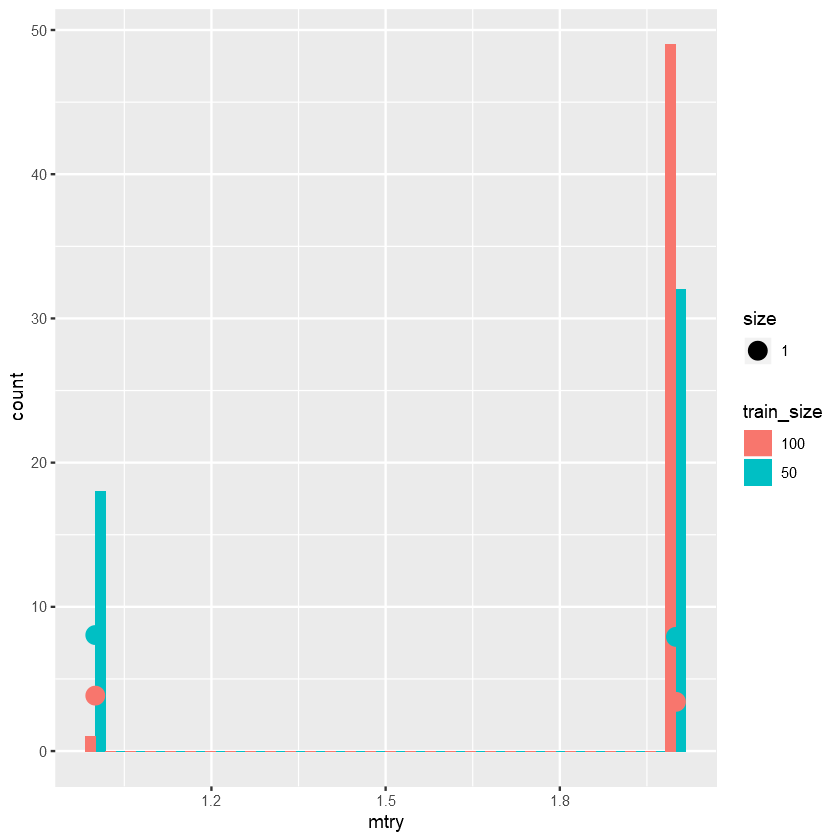

In [6]:
ggplot(data = tune.1, aes(x = mtry, group = train_size ,fill = train_size)) + #, fill = as.factor(seed)
        geom_histogram(position = "dodge") +
        geom_point(data = tune.1[,.(mean_best_perf = mean(best_perf)/10),.(mtry,train_size)], aes(x = mtry , y = mean_best_perf, col = train_size, size = 1 ))

### 10CV

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


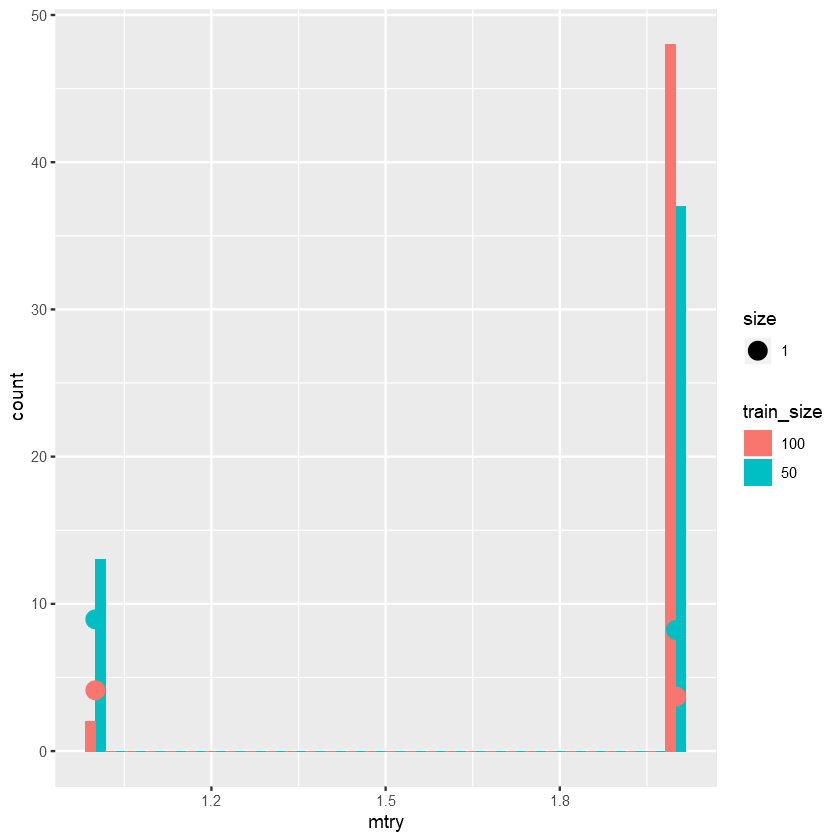

In [7]:
ggplot(data = tune10.1, aes(x = mtry, group = train_size ,fill = train_size)) + #, fill = as.factor(seed)
        geom_histogram(position = "dodge") +
        geom_point(data = tune10.1[,.(mean_best_perf = mean(best_perf)/10),.(mtry,train_size)], aes(x = mtry , y = mean_best_perf, col = train_size, size = 1 ))

## ntree

### LOOB

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


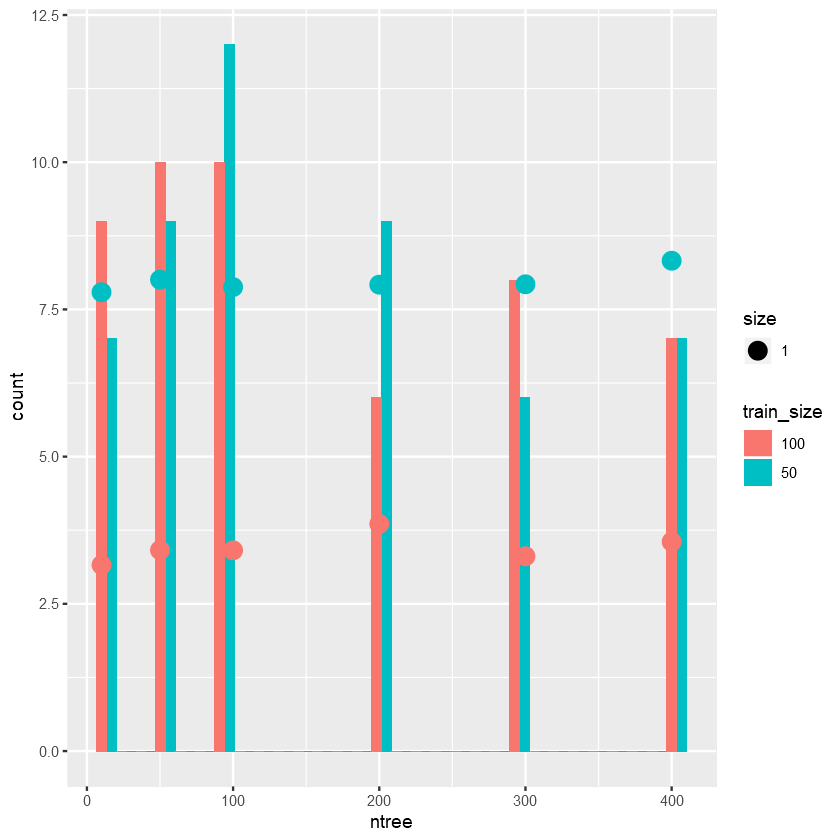

In [8]:
ggplot(data = tune.1, aes(x = ntree, group = train_size ,fill = train_size)) + #, fill = as.factor(seed)
        geom_histogram(position = "dodge") +
        geom_point(data = tune.1[,.(mean_best_perf = mean(best_perf)/10),.(ntree,train_size)], aes(x = ntree , y = mean_best_perf, col = train_size, size = 1 ))

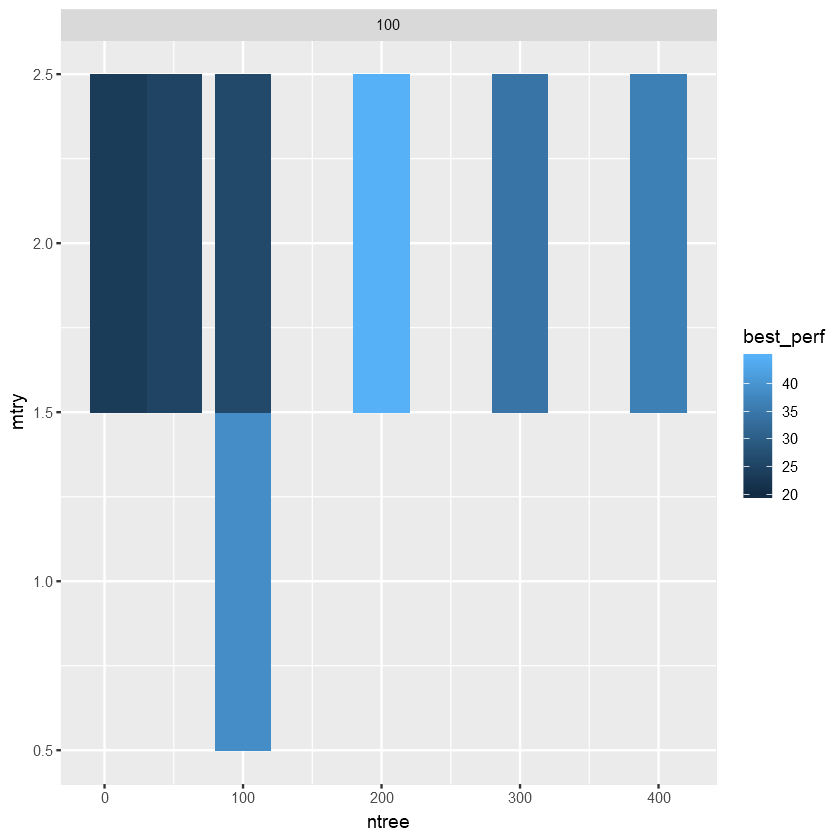

In [9]:
ggplot(data = tune.1[train_size == 100], aes(ntree,mtry, fill = best_perf)) +
     geom_tile() + facet_wrap(~train_size)

### 10CV

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


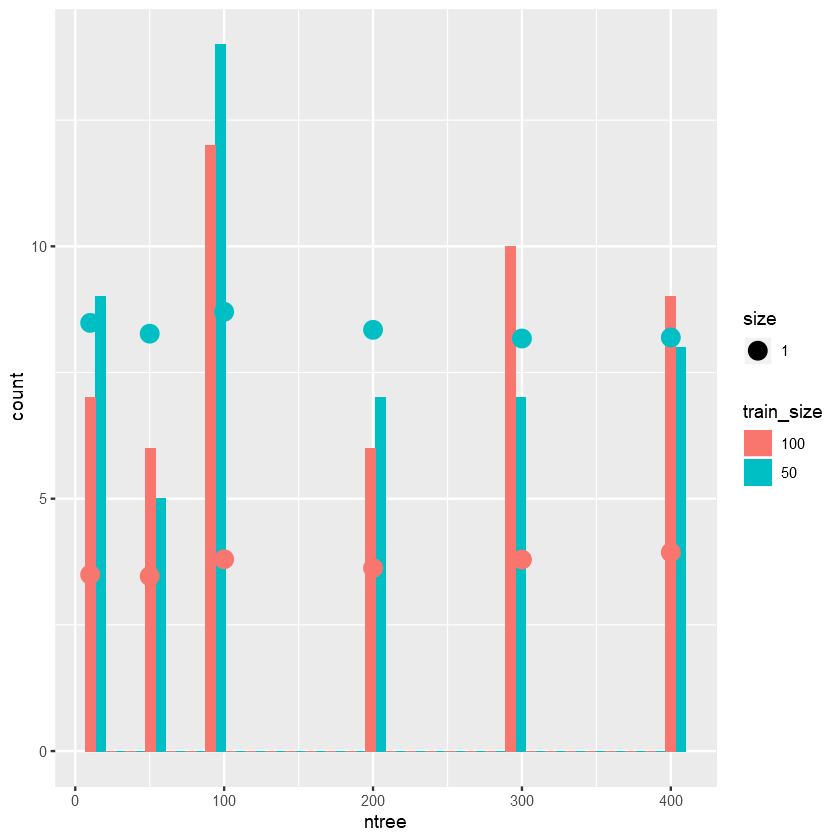

In [10]:
ggplot(data = tune10.1, aes(x = ntree, group = train_size ,fill = train_size)) + #, fill = as.factor(seed)
        geom_histogram(position = "dodge") +
        geom_point(data = tune10.1[,.(mean_best_perf = mean(best_perf)/10),.(ntree,train_size)], aes(x = ntree , y = mean_best_perf, col = train_size, size = 1 ))

# Dummy Model

In [11]:
tune_50.2 = fread(outputs.path.2.1)
tune_100.2 = fread(outputs.path.2.2)

tune.2 = rbind(data.table(tune_50.2, train_size = "50")
              ,data.table(tune_100.2, train_size = "100"))

In [12]:
tune10_50.2 = fread(outputs.path10.2.1)
tune10_100.2 = fread(outputs.path10.2.2)

tune10.2 = rbind(data.table(tune10_50.2, train_size = "50")
              ,data.table(tune10_100.2, train_size = "100"))

## mtry

### LOOB

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


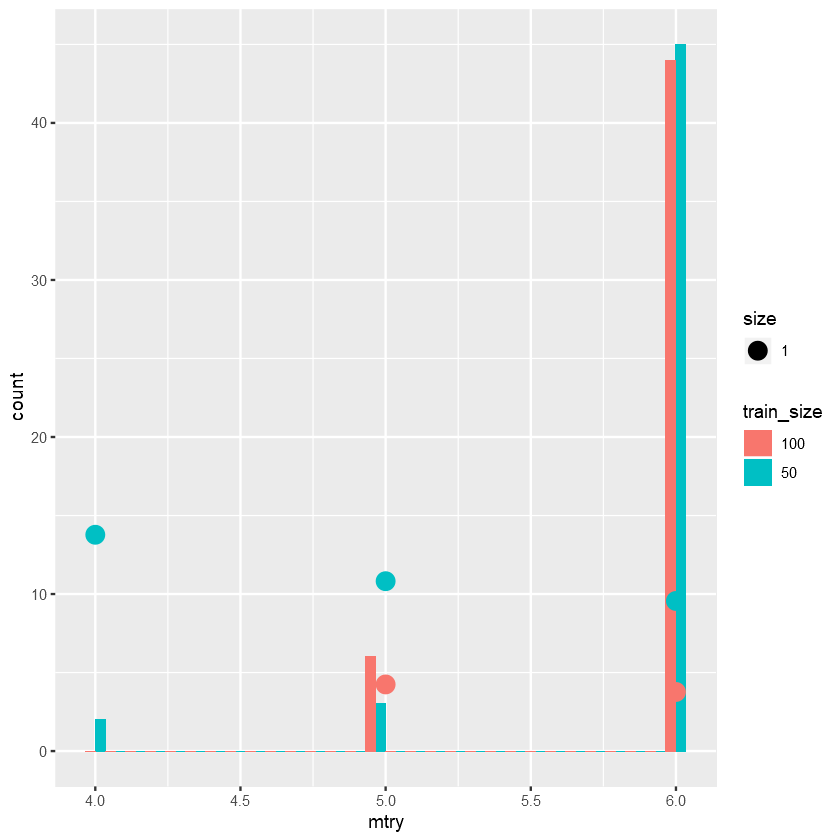

In [13]:
ggplot(data = tune.2, aes(x = mtry, group = train_size ,fill = train_size)) + #, fill = as.factor(seed)
        geom_histogram(position = "dodge") +
        geom_point(data = tune.2[,.(mean_best_perf = mean(best_perf)/10),.(mtry,train_size)], aes(x = mtry , y = mean_best_perf, col = train_size, size = 1 ))

### 10CV

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


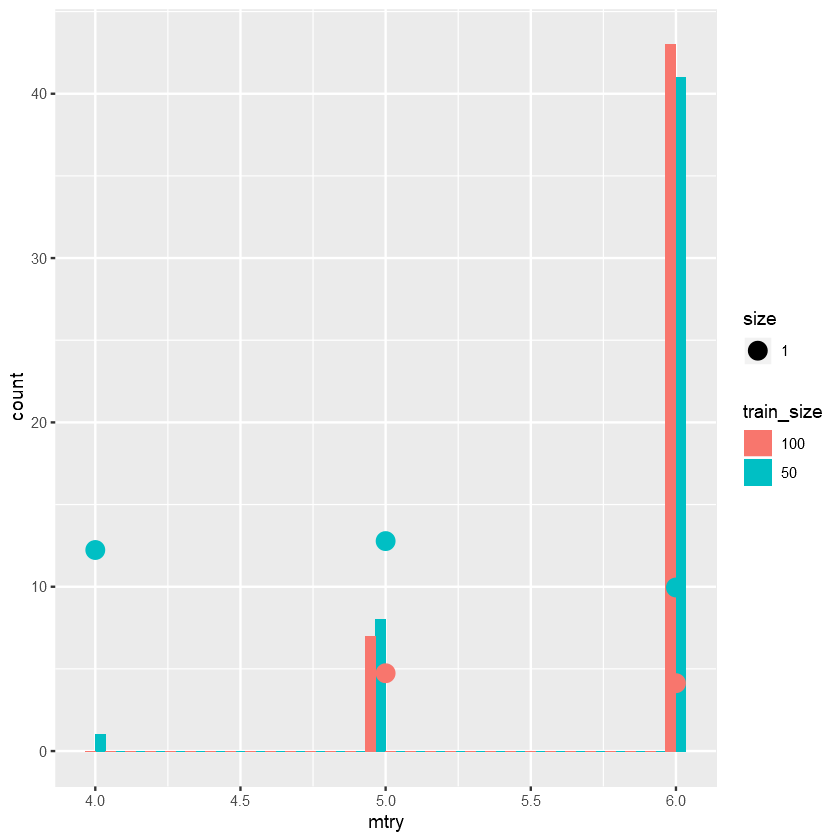

In [14]:
ggplot(data = tune10.2, aes(x = mtry, group = train_size ,fill = train_size)) + #, fill = as.factor(seed)
        geom_histogram(position = "dodge") +
        geom_point(data = tune10.2[,.(mean_best_perf = mean(best_perf)/10),.(mtry,train_size)], aes(x = mtry , y = mean_best_perf, col = train_size, size = 1 ))

## ntree

### LOOB

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


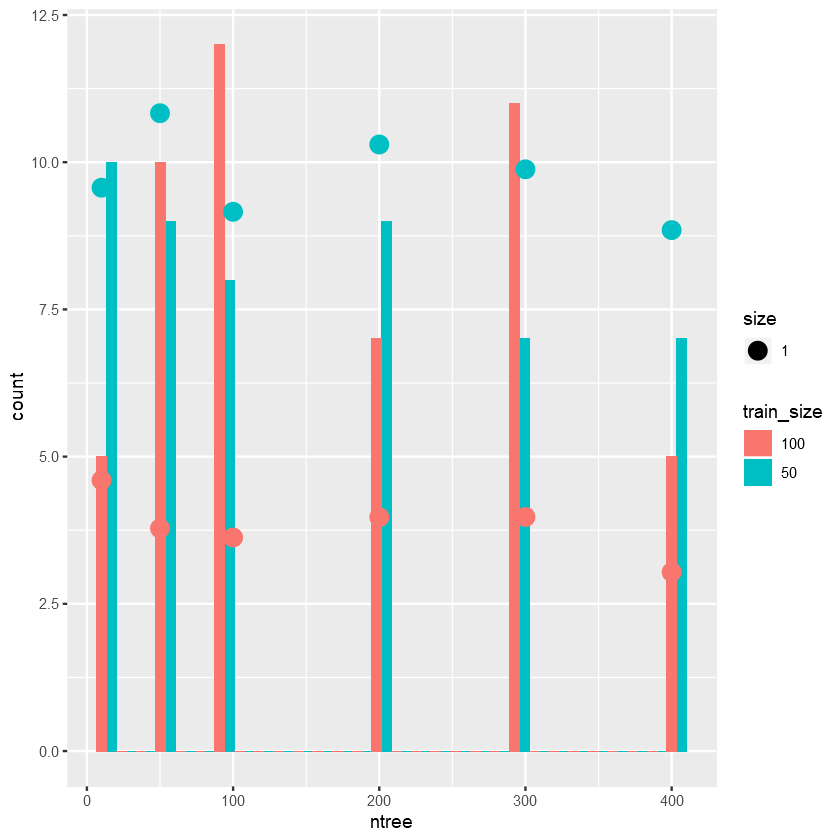

In [15]:
ggplot(data = tune.2, aes(x = ntree, group = train_size ,fill = train_size)) + #, fill = as.factor(seed)
        geom_histogram(position = "dodge") +
        geom_point(data = tune.2[,.(mean_best_perf = mean(best_perf)/10),.(ntree,train_size)], aes(x = ntree , y = mean_best_perf, col = train_size, size = 1 ))

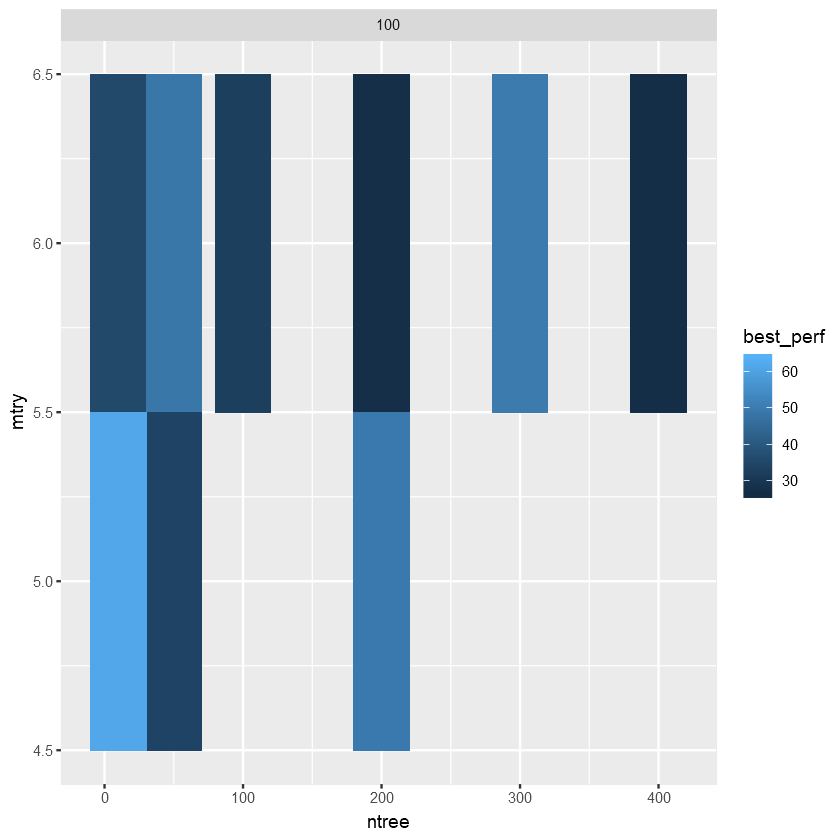

In [16]:
ggplot(data = tune.2[train_size == 100], aes(ntree,mtry, fill = best_perf)) +
     geom_tile() + facet_wrap(~train_size)

### 10CV

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


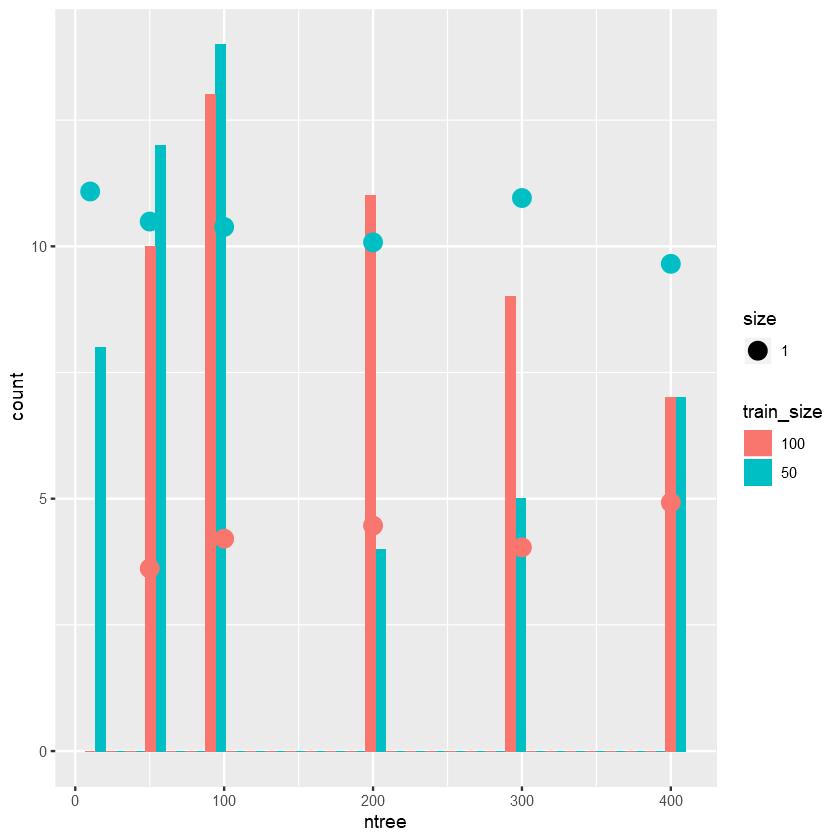

In [17]:
ggplot(data = tune10.2, aes(x = ntree, group = train_size ,fill = train_size)) + #, fill = as.factor(seed)
        geom_histogram(position = "dodge") +
        geom_point(data = tune10.2[,.(mean_best_perf = mean(best_perf)/10),.(ntree,train_size)], aes(x = ntree , y = mean_best_perf, col = train_size, size = 1 ))